*SOMEONE CAN ADD IN TITLE

*SOMEONE CAN ADD IN INTRODUCTION
- data from: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
- background information, help eaders understand
- research question, what we are trying to prove: "Can we predict fetal health (1,2 or 3) (Normal, Suspected, Pathological) , using classification model with baseline fetal heart beat, Fetal Movement, uterine contractions and mean value of short term variability ?"
- data set description and identification

In [1]:
#load libraries 
library(tidyverse)
library(repr)
library(rvest)
library(dplyr)
library(readxl)
library(cowplot)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



*SOMEONE CAN FIND OUT HOW TO READ THIS FILE FROM THE INTERNET OR GITHUB. WE FOUND THE FILE BUT COULD NOT FIGURE OUT HOW TO LOAD IT "VIA THE WEB" LIKE THE PROJECT ASKED FOR, SO THAT STILL NEEDS TO BE DONE OR THE FILE CAN BE UPLOAED TO GITHUB OURSLEVES - currently, we worked on this by dowloading the file from the website and then loading it into our juptyer notebook

In [3]:
#demonstrate that the web data set can be read from the web into R
fetal_health <- read_csv("fetal_health.csv")
fetal_health

Rows: 2126 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): baseline value, accelerations, fetal_movement, uterine_contraction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,0.000,0.000,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0.000,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0.000,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0.000,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0.000,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0.000,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3
134,0.001,0.000,0.013,0.008,0,0.003,29,6.3,0,⋯,50,200,6,3,71,107,106,215,0,3
122,0.000,0.000,0.000,0.000,0,0.000,83,0.5,6,⋯,62,130,0,0,122,122,123,3,1,3
122,0.000,0.000,0.002,0.000,0,0.000,84,0.5,5,⋯,62,130,0,0,122,122,123,3,1,3


*SOMEONE NARRATE THE CLEANING AND WRANGLING THAT IS BELOW, BASICALLY WE NEED TO WRITE OUT HERE WHAT WE ARE DOING AND WHY WE ARE DOING IT !!


Answer: I transposed the data frame(fetal_health) from columns to rows to make the data set tidy. This was done using the t() function and hence results in easier understanding of the values without any worry about correct alignment of the values to the headers. Missing values were checked using the "is.na()" function.

Removed columns of histogram data and stuff - explain why ! 

Write out explanations of why we were doing the codes, provide explanation and proof similar to wording in the worksheet. 

In [4]:
#cleaning and wrangling data
fetal_health_t <- t(fetal_health)
fetal_health_t                
#ultimately not even sure if we need to add the select stuff, this isn't nesseasary to make it 'tidy' technically

#select for data columns we need
selected_fetal_health <- select(fetal_health, "baseline value", fetal_movement, uterine_contractions, mean_value_of_short_term_variability, fetal_health)

#change "baseline value" to be baseline_value
colnames(selected_fetal_health)[1] = "Baseline_value"


#we will be treating fetal_health as a categorcal variable, therefore fetal_health has to be a factor. Re-name fetal_health
factored_fetal_health <- selected_fetal_health|> 
    mutate(fetal_health = as.factor(fetal_health))
factored_fetal_health

baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,⋯,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,142.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,⋯,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,⋯,0.004,0.008,0.006,0.007,0.005,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,⋯,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,⋯,80.000,79.000,79.000,79.000,77.000,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,⋯,0.200,0.300,0.500,0.600,0.700,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,⋯,36.000,20.000,26.000,27.000,17.000,25.000,22.000,20.000,27.000,36.000
mean_value_of_long_term_variability,2.4,10.400,13.400,23.000,19.900,0.000,0.000,15.6,13.600,10.600,⋯,2.200,8.500,7.000,6.400,6.000,7.200,7.100,6.100,7.000,5.000


Baseline_value,fetal_movement,uterine_contractions,mean_value_of_short_term_variability,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0.000,0.5,2
132,0.000,0.006,2.1,1
133,0.000,0.008,2.1,1
134,0.000,0.008,2.4,1
132,0.000,0.008,2.4,1
134,0.000,0.010,5.9,3
134,0.000,0.013,6.3,3
122,0.000,0.000,0.5,3
122,0.000,0.002,0.5,3


*SOMEONE CAN RUN CODE ABOVE TO FIGURE OUT IF THERE ARE ANY MISSING VALUES IN THE DATA SET. 
*SOMEONE CAN MAKE SURE THE OUTPUT OF THE CELLS ABOVE ARE IN TIDY FORMAT


--ANSWER- Ran the code using is.na() function to check if there were any missing values in the Data set and found 0. 

*SOMEONE DOES DATA SUMMARIZATION - in at least one table (this is exploratory data analysis). 
An  reports the number of observations in each class,
the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


In [5]:
selected_factored_fetal_health <- factored_fetal_health |> 
                                  select(Baseline_value, fetal_movement, uterine_contractions, mean_value_of_short_term_variability)


#finding the means of the predictor and explanatory variables we plan to use in our analysis.
means <- selected_factored_fetal_health |>
         map_df(mean, na.rm = TRUE)
means


#finding the maximum of the predictor and explanatory variables we plan to use in our analysis.
maximum <- selected_factored_fetal_health |>
         map_df(max, na.rm = TRUE)
maximum


#finding the minimum of the predictor and explanatory variables we plan to use in our analysis.
minimum <- selected_factored_fetal_health |>
         map_df(min, na.rm = TRUE)
minimum


#finding the number of the observations in the predictor and explanatory variables we plan to use in our analysis.
observations <- selected_factored_fetal_health |>
                summarize(n = n())

observations


Baseline_value,fetal_movement,uterine_contractions,mean_value_of_short_term_variability
<dbl>,<dbl>,<dbl>,<dbl>
133.3039,0.009480715,0.004366416,1.332785


Baseline_value,fetal_movement,uterine_contractions,mean_value_of_short_term_variability
<dbl>,<dbl>,<dbl>,<dbl>
160,0.481,0.015,7


Baseline_value,fetal_movement,uterine_contractions,mean_value_of_short_term_variability
<dbl>,<dbl>,<dbl>,<dbl>
106,0,0,0.2


n
<int>
2126


DATA VISUALS

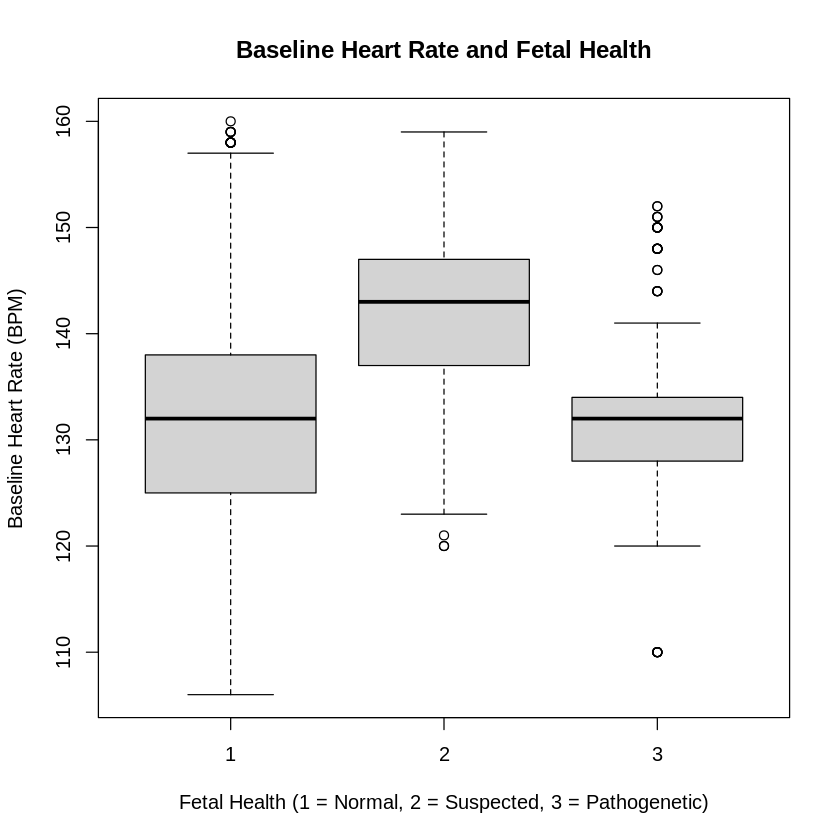

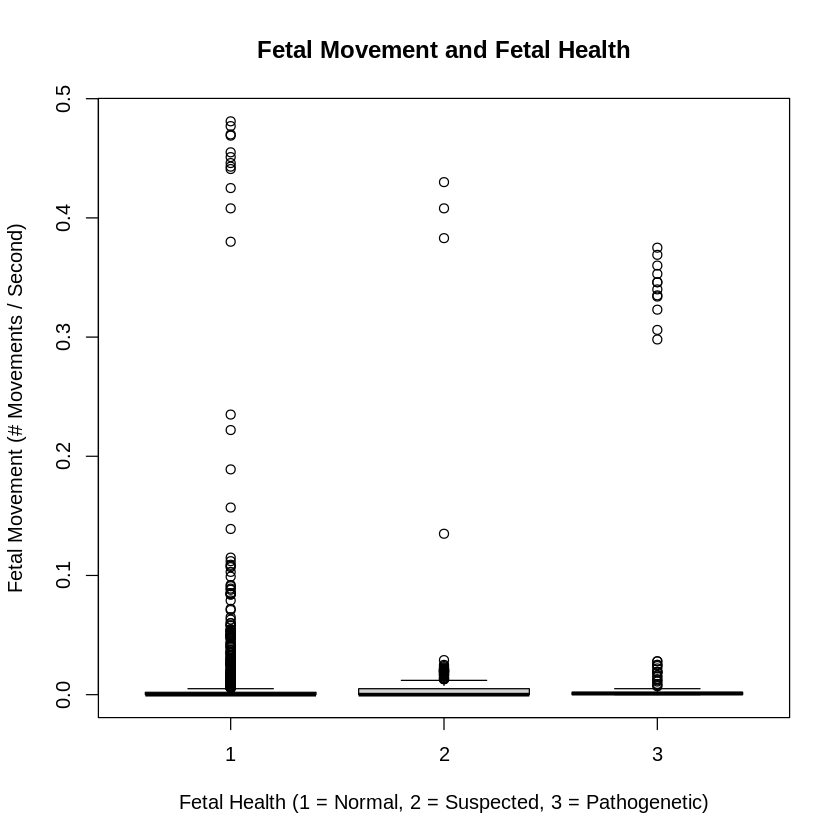

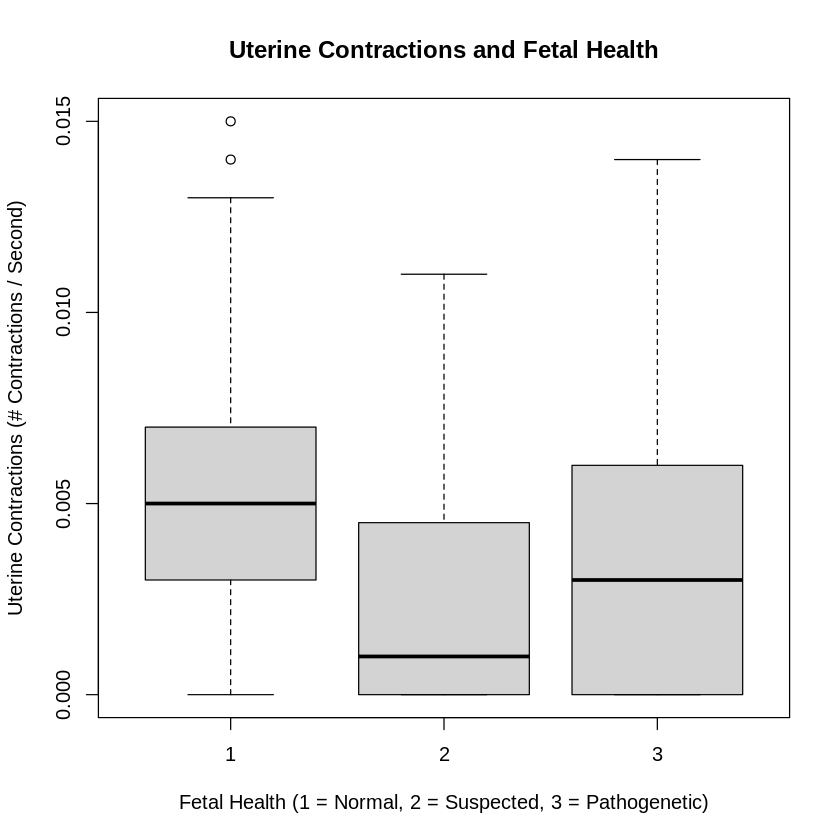

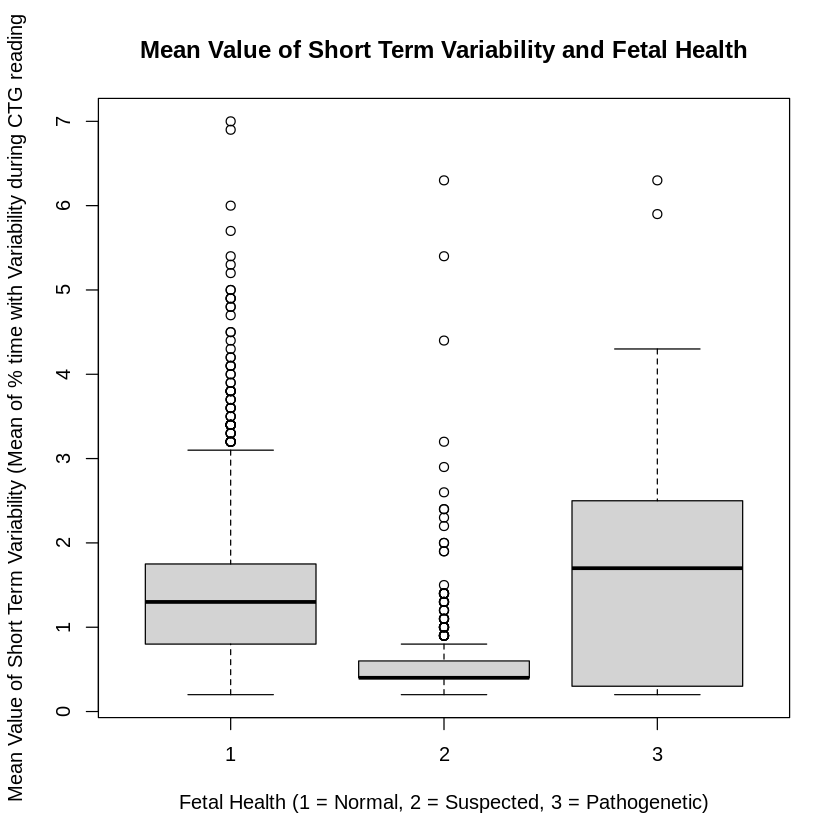

In [6]:
#create data visual, currently I made these diffrent boxplots to show the distributions of each variable we are using
#to make our classification model, plotted against the fetal health score (1,2,3)

#However, we need to add them all together somehow into a one nice figure and then go from there for the submission

boxplot_Baseline_value <- boxplot(Baseline_value~fetal_health,data = factored_fetal_health, main = "Baseline Heart Rate and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Baseline Heart Rate (BPM)")

boxplot_fetal_movement <- boxplot(fetal_movement~fetal_health,data = factored_fetal_health, main = "Fetal Movement and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Fetal Movement (# Movements / Second)")

boxplot_uterine_contractions <- boxplot(uterine_contractions~fetal_health,data = factored_fetal_health, main = "Uterine Contractions and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Uterine Contractions (# Contractions / Second)")

boxplot_mean_value_of_short_term_variability <- boxplot(mean_value_of_short_term_variability~fetal_health,data = factored_fetal_health, main = "Mean Value of Short Term Variability and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Mean Value of Short Term Variability (Mean of % time with Variability during CTG reading")

*SOMEONE CAN RUN A FUNCTION TO PUT ALL OF THESE BOX PLOTS INTO ONE NICE FIGURE ^^

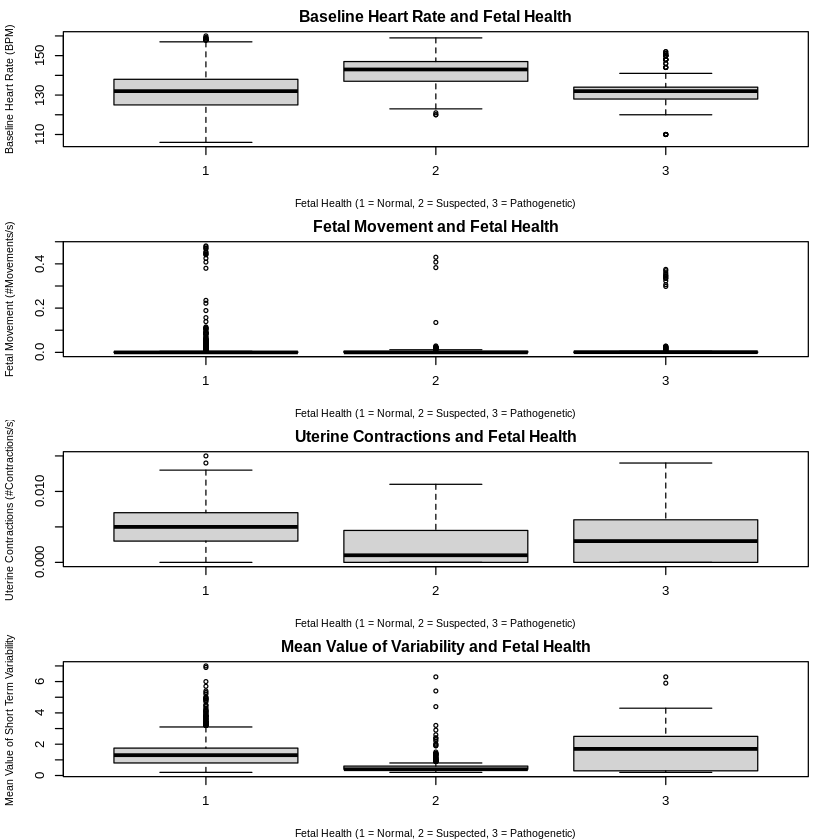

In [10]:
# Set up the plotting area with a 4x1 grid of subplots
par(mfrow = c(4,1))
par(mar = c(4, 4, 2, 2)) # margin of the matrix
par(cex.lab = 0.8, cex.main = 1.2) #size of font

boxplot(Baseline_value~fetal_health,data = factored_fetal_health, main = "Baseline Heart Rate and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Baseline Heart Rate (BPM)")
 

boxplot(fetal_movement~fetal_health,data = factored_fetal_health, main = "Fetal Movement and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Fetal Movement (#Movements/s)")


boxplot(uterine_contractions~fetal_health,data = factored_fetal_health, main = "Uterine Contractions and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Uterine Contractions (#Contractions/s)")


boxplot(mean_value_of_short_term_variability~fetal_health,data = factored_fetal_health, main = "Mean Value of Variability and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Mean Value of Short Term Variability ")


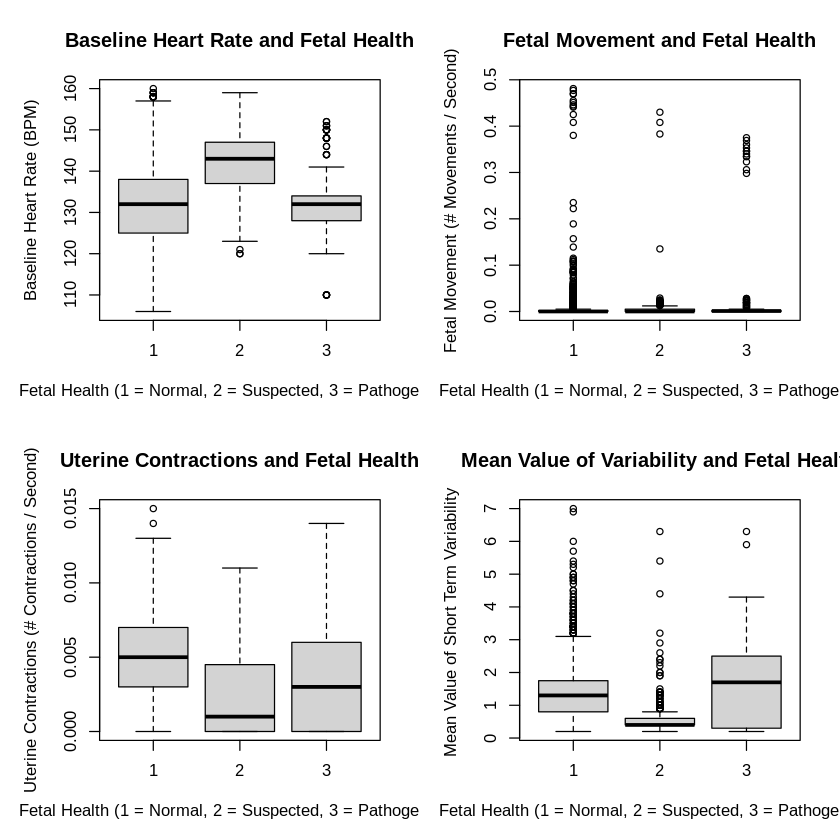

In [8]:
# Set up the plotting area with a 2x2 grid of subplots
par(mfrow = c(2,2))
par(mar = c(5, 5, 4, 2))

boxplot(Baseline_value~fetal_health,data = factored_fetal_health, main = "Baseline Heart Rate and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Baseline Heart Rate (BPM)")
 

boxplot(fetal_movement~fetal_health,data = factored_fetal_health, main = "Fetal Movement and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Fetal Movement (# Movements / Second)")


boxplot(uterine_contractions~fetal_health,data = factored_fetal_health, main = "Uterine Contractions and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Uterine Contractions (# Contractions / Second)")


boxplot(mean_value_of_short_term_variability~fetal_health,data = factored_fetal_health, main = "Mean Value of Variability and Fetal Health", 
   xlab = "Fetal Health (1 = Normal, 2 = Suspected, 3 = Pathogenetic)", ylab = "Mean Value of Short Term Variability ")

METHOD SECTION:

In this study, we aim to build a classification model to predict fetal health as Normal, Suspected or Pathogenetic based on four variables: Baseline Fetal Heart Beat, Fetal Movement, Uterine Contractions, and Mean Value of Short Term Variability. To accurately compare the variables, they must be scaled.

The dataset is then divided into a training dataset comprising 75% of the data and a test dataset comprising the remaining 25%. The training dataset is used to build and train our model, while the test dataset is used to assess the accuracy of our model.

To build our classification model, we use the k-nearest neighbors function with a weight function set to "rectangular," the "kknn" engine, and "classification" mode. We initially choose an arbitrary number for K, maybe ~5, and then adjust it later to improve the accuracy of our model.

We use the fit function to train our model, passing the k-nearest neighbors specifications with the fetal health variable as the target and with the Baseline Fetal Heart Beat, Fetal Movement, Uterine Contractions and Mean Value of Short Term Variability as our predictors. Next, we use the recipe function to prepare our dataset, and then create a workflow using the workflow function, feeding in our recipe and the k-nearest neighbors model. Using the predict function, we pass in the model data and the test data, binding the columns of the test data to create a new dataset for analysis. 

Lastly, we use the metrics function to evaluate the accuracy of our model. If the accuracy is high, our model is effective at predicting fetal health. If the accuracy is low, we may need to revise our variables and repeat the process, or we can tune our model using cross-validation and the vfold_cv function to select the most accurate K nearest neighbor value for our model.

To visualize our results, we will create a scatter plot of the predicted fetal health against one of the predictors, such as Baseline Fetal Heart Beat or Fetal Movement. This can help us see how well our model is able to separate the different classes of fetal health based on these predictors.







EXPECT OUTCOMES AND SIGNIFICANCE

Outcomes: -The dataset will provide insights into the factors that affect fetal health during pregnancy. -The analysis will identify key predictors of fetal health and provide a model for predicting fetal health outcomes. -The results will help healthcare professionals to better monitor fetal health and intervene when necessary to improve outcomes.

Significance: -A box plot of the baseline value variable (i.e., the baseline fetal heart rate) can help to identify any potential outliers or patterns in the data that may be associated with fetal distress. If there is a significant difference in the distribution of baseline heart rate between fetuses with and without distress, this could suggest that baseline heart rate is an important predictor of fetal health outcomes.

-By using box plots to explore the relationship between various maternal and fetal characteristics and the likelihood of fetal distress, we can gain a better understanding of the factors that affect fetal health during pregnancy. This can inform prenatal care and help healthcare professionals to identify high-risk pregnancies early on, potentially leading to better outcomes for both mothers and babies.